# 4 - Distributed information processing in hierarchies
This notebook is part of the supplementary material for:  
Genewein T., Leibfried F., Grau-Moya J., Braun D.A. (2015) *Bounded rationality, abstraction and hierarchical decision-making: an information-theoretic optimality principle*, Frontiers in Robotics and AI.  

See the original publication at **link** (**DOI**)

More information on how to run the notebook on the accompanying github repsitory **link** where you can also find updated versions of the code and notebooks.

This notebook corresponds to Section 4 and reproduces Figures 9, and 10 of the paper.

# Use this notebook to compare any two hierarchical cases (parallel, serial or general)


Note that the notebook by default compares two parallel cases against each other, which is in correspondence with Section 4 of the paper. However, the notebook **is not limited to the parallel case** as it computes the parallel-case solutions through the general case by setting the inverse temperatures accordingly. The serial or general case can thus be easily reproduced with different settings of the $\beta$-values.

# Parallel information processing hierarchies

Here, we design a two-level parallel information processing hierarchy. The hierarchy consists of high-level models $x$ that partition the search-space over $A$ according to $p(a|x)$. Based on this partitioning (which reduces the effective size of the search space over $a$), information about the current world-state $w$ is used to compute the behavior $p(a|w,x)$ on the low level of the hierarchy. Additionally, the correct model $x$ needs to be selected according to $w$ which leads to the model selctor $p(x|w)$. The low level of the hierarchy is designed as a bounded rational decision maker that uses the partitioning $p(a|x)$ as a prior.
$$\begin{align}
&\text{1. Selection of model (or expert):} & p(x|w) &\\
&\text{2. Prior knowledge of model (or expert):} & p(a|x) &\\
&\text{3. Bounded rational decision of model (or expert):} & p^*(a|w,x)&=\frac{1}{Z(w,x)}p(a|x)e^{\beta_3 U(w,a)}
\end{align}$$



The two levels of the hierarchy allow to reduce the uncertainty over an action $a$, given a world-state $w$, in 
two steps

$$\underbrace{I(W,X;A)}_{\text{total reduction}} = \underbrace{I(X;A)}_{\text{high-level}} + \underbrace{I(W;A|X)}_{\text{low-level}},$$

which allows to distribute the total information processing load across both levels of the hierarchy.

## Design of (bounded) optimal models and model-selector
The parallel information processing hierarchy requires to specify the models $p(a|x)$ as well as the model selector $p(x|w)$. Below, we set up a variational problem that trades-off large expected utility against low information processing cost. Interestingly, the solution to the variational problem specifies the (bounded optimal) models and model selector.

The optimization principle that leads to the bounded-optimal hierarchy trades off expected utility against the computational cost of model selection $I(W;X)$ and the cost of the low-level decision using the model as a prior $I(W;A|X)$:
$$\underset{p(x|w),p(a|w,x)}{\operatorname{arg~max}}~\mathbf{E}_{p(w,x,a)}[U(w,a)] - \frac{1}{\beta_1} I(W;X) - \frac{1}{\beta_3} I(W;A|X)$$

The set of self-consistent solutions is given by:
$$\begin{align}
p^*(x|w)&=\frac{1}{Z(w)}p(x)\exp \left(\beta_1 \Delta F_{\text{par}}(w,x)\right)\\
p(x)&=\sum_w p(w)p^*(x|w) \\
p^*(a|w,x)&=\frac{1}{Z(w,x)}p^*(a|x)\exp \left( \beta_3  U(w,a) \right)\\
p^*(a|x)&=\sum_w p(w|x) p^*(a|w,x),
\end{align}$$
where $Z(w)$ and $Z(w,x)$ denote the corresponding normalization constants or partition sums.  $p(w|x)$ is given by Bayes' rule $p(w|x) = \frac{p(w)p^*(x|w)}{p(x)}$ and $\Delta F_{\text{par}}(w,x)$ is the free energy difference of the low-level stage:
$$ \Delta F_{\text{par}}(w,x):=\mathbf{E}_{p^*(a|w,x)}[U(w,a)] -  \frac{1}{\beta_3} D_{\mathrm{KL}}(p^*(a|w,x)||p^*(a|x)).$$

# Illustrative example

One key consequence of the bounded optimal solution for the models $p^*(a|x)$ is that they optimize the downstream free energy trade-off $\Delta F_{\text{par}}(w,x)$ of the low level of the hierarchy. The models are thus governed by the computational resources of the low level of the hierarchy as well as the utility function (the environment of the agent). We illustrate this below by comparing bounded optimal solutions for the hierarchy in two different environments where the only difference is $p(w)$ - the optimal models and model selector depend on $p(w)$ through the expected utility which is part of the free energy of the low-level stage.

In [1]:
using RateDistortionDecisionMaking, Distances, DataFrames, Colors, Gadfly, Distributions, Interact, Reactive

#make the default plot size a bit larger
set_default_plot_size(15cm, 12cm)

## Medical system example - utility U(a,w)

In a simplified environment only three kinds of diseases exist, but they come in different types
*  Heart disease
  * Type $h1$
  * Type $h2$
*  Lung disease 1
  * Type $l1$
  * Type $l2$
*  Lung disease 2
  * Type $l3$
  * Type $l4$
  
The following treatments are available
*  General treatment heart: treat $h$
  * Specific treatement $h1$: treat $h1$
  * Specific treatement $h2$: treat $h2$
*  General treatment lung: treat $l$
  * Treatment lung disease 1: treat $l12$
    * Specific treatment $l1$: treat $l1$
    * Specific treatment $l2$: treat $l2$
  * Treatment lung disease 2: treat $l34$
    * Specific treatment $l3$: treat $l3$
    * Specific treatment $l4$: treat $l4$
    

The specific treatements work best (leading to maximum utility) if applied to the correct disease but work worse than the general treatments if applied to the wrong disease type. For lung disease 1 and 2 there are treatments that work well for the corresponding sub-types ($l1$, $l2$ and $l3$, $l4$ respectively), but the treatements are less efficient than the specific-type treatments. The utility function is shown by evaluating the cell below.

The goal is to design an optimal medical system that takes measurements to determine the disease type and then initiates a treatment. However, the budget for taking measurements is limited which means that not all specific disease types can be identified. Rather, the most important measurements must be taken first, in order to maximize therapy success (expected utility).  
The system consists of a two level hierarchy: an automated system that can take standard measurements cheaply and then forms a first diagnosis $x$ according to $p^*(x|w)$. This first diagnosis is the basis for sending a patient to a specialist (with prior knowledge $p^*(a|x)$). The specialist can take additional measurements to determine the final treatment $p^*(a|w,x)$. See main paper for more details on the example.


### [Interact] Change the example by loading a different utility function (requires some work)
... use any of the examples provided in the other notebooks by changing lines 2 and 3 below accordingly (see the other notebooks). Additionally you might want to adapt axis labels ect. in all code-cells below (which is a bit of work). 

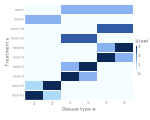

In [14]:
#set up medical diagnosis system example
include("MedicalSystemExample.jl")
w_values, w_strings, a_values, a_strings, p_w_uni, U = setup_medical_example()


numa = length(a_strings)
a_vec = [1:numa]

numw = length(w_strings)
w_vec = [1:numw]

#pre-compute utility
U_pre, Umax = setuputilityarrays(a_values,w_values,U)

#visualize utility

plt_utility = visualizeMatrix(U_pre, w_values, a_values, w_strings, a_strings, xlabel="Disease type w",
                              ylabel="Treatment a", legendlabel="U(a,w)")


## Uniform vs. non-uniform $p(w)$

We design two possible environments to see how the environment affects the formation of bounded optimal hierarchies. In environment $p_1(w)$ all disease types occur with equal probability - in environment $p_2(w)$ both types of the heart disease have an increased chance of occuring.

In [15]:
#nonuniform p_w
p_w_nonuni = medical_nonuniform_pw(numw)

plt_pw_uni = visualizeBAmarginal(p_w_uni, w_vec, w_strings, alabel="Disease type w", legendlabel="p1(w)")
plt_pw_nonuni = visualizeBAmarginal(p_w_nonuni, w_vec, w_strings, alabel="Disease type w", legendlabel="p2(w)")

display(hstack(plt_pw_uni, plt_pw_nonuni))

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p2(w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 Disease type w 
 
 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p1(w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 Disease type w

## [Interact] Set parameters to compare the two cases here:
When changing the parameters make sure to re-run the corresponding cells below - in case of doubt simply re-run all cells below.

You can change the inverse temperatures to make information processing on either level of the hierarchy cheaper or more expensive or you can switch to a different case (serial or general). Additionally, you can set a different $p(w)$ for each case and you can change the $|\mathcal{X}|$ the cardinality of $X$ which translates into the number of experts (or different models). Note that the cardinality of $X$ is an upper bound for $H(X)$ which in turn is an upper bound for $I(X;W)$ and $I(A;X)$ - this means that the capacity (that is the maximally possible rate) of these two channels can be limited through the cardinality of $X$. This is not the same as limiting the actual rate on these channels by adjusting $\beta_1$ or $\beta_2$.

In [16]:
#inverse temperatures
#β1: model selection -> inv. price for automated diagnosis (I(X;W))
#β2=∞: high-level decision -> inv. price for I(A;X)
#β3: low-level decision -> inv. price for manual diagnosis by specialist (I(A;W|X))

#parameters for case 1 - hierarchical, uniform environment
β1 = 1#2.5
β2 = Inf  
β3 = 0.9#1
pw = p_w_uni
#cardinality of x - number of different kinds of specialists
numx = 3


#paremters for case 2 - hierarchical, nonuniform environment
β1_n = 1#2.5
β2_n = Inf  
β3_n = 0.9#1
pw_n = p_w_nonuni
#cardinality of x - number of different kinds of specialists
numx_n = 3

#paremters for case 2 - sequential, uniform environment
#β1_n = 10
#β2_n = 10  
#β3_n = 0
#pw_n = p_w_uni


#parameters for iteration of self-consistent equations
ε = 0.0001 #convergence critetion for BAiterations
maxiter = 10000 #maximum number of BA iterations

10000

## Iterating the self-consistent equations to compute bounded optimal solutions

### Case 1

In [17]:
x_vec = [1:numx]
x_strings = map((x)->"x"*string(x), x_vec)


#This function performs Blahut-Arimoto iterations for the three-variable general case
px, pa, pxgw, pagx, pagxw, pagw, performance_df = threevarBAiterations(numx, β1, β2, β3, U_pre, pw, ε, maxiter,
                                                  compute_performance=true, performance_as_dataframe=true,
                                                  init_pogw_sparse = true, init_pogw_uniformly = false,
                                                  init_pagow_uniformly = true);

In [18]:
#call the routine that creates plots for all the probability distributions
plt_px, plt_pa, plt_pxgw, plt_pagx, plt_pagw, dpdown, plt_pagxw_vis = visualize_three_var_BAsolution(px, pa,
                                                                      pxgw, pagx, pagxw, pagw,
                                                                      x_vec, a_vec, w_vec,
                                                                      x_strings, a_strings, w_strings, 
                                                                      olabel_string="x", alabel_string="a", wlabel_string="w")
; #suppress output

### Case 2

In [19]:
x_vec_n = [1:numx_n]
x_strings_n = map((x)->"x"*string(x), x_vec_n)

#This function performs Blahut-Arimoto iterations for the three-variable general case
px_n, pa_n, pxgw_n, pagx_n, pagxw_n, pagw_n, performance_df_n = threevarBAiterations(numx_n, β1_n, β2_n, β3_n, U_pre, pw_n, ε, maxiter,
                                                                                     compute_performance=true, performance_as_dataframe=true,
                                                                                     init_pogw_sparse = true, init_pogw_uniformly = false,
                                                                                     init_pagow_uniformly = true);


#call the routine that creates plots for all the probability distributions
plt_px_n, plt_pa_n, plt_pxgw_n, plt_pagx_n, plt_pagw_n, dpdown_n, plt_pagxw_vis_n = visualize_three_var_BAsolution(px_n, pa_n,
                                                                                    pxgw_n, pagx_n, pagxw_n, pagw_n,
                                                                                    x_vec_n, a_vec, w_vec,
                                                                                    x_strings_n, a_strings, w_strings, 
                                                                                    olabel_string="x", alabel_string="a",
                                                                                    wlabel_string="w")

; #suppress output

## Visualize case 1 (left column) and case 2 (right column)

**Note that $X$ is labeled here with the general term "Observation" but of course it indicates the first diagnosis (or model) in this example**

In [20]:
#visualize p(x|w)
display(hstack(plt_pxgw,plt_pxgw_n))
#visualize p(a|x)
display(hstack(plt_pagx,plt_pagx_n))
#visualize p(a|w)
display(hstack(plt_pagw,plt_pagw_n))

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(x|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x1 
 x2 
 x3 
 
 
 Observation x 
 
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(x|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x1 
 x2 
 x3 
 
 
 Observation x

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Observation x 
 
 
 x1 
 x2 
 x3 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|x) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 Observation x 
 
 
 x1 
 x2 
 x3 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|x) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a

### $p(a|x,w)$ case 1

Options{:Dropdown,ASCIIString}([Input{ASCIIString}] l4,"World state w","l4","h1",OptionDict({"h1","h2","l1","l2","l3","l4"},{"h1"=>"h1","h2"=>"h2","l2"=>"l2","l4"=>"l4","l3"=>"l3","l1"=>"l1"}),None[],None[])

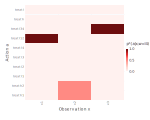

In [22]:
#visualize p(a|x,w)
display(dpdown)
display(plt_pagxw_vis)

### $p(a|x,w)$ case 2

Options{:Dropdown,ASCIIString}([Input{ASCIIString}] l2,"World state w","l2","h1",OptionDict({"h1","h2","l1","l2","l3","l4"},{"h1"=>"h1","h2"=>"h2","l2"=>"l2","l4"=>"l4","l3"=>"l3","l1"=>"l1"}),None[],None[])

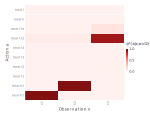

In [24]:
#visualize p(a|x,w)
display(dpdown_n)
display(plt_pagxw_vis_n)

## Compare performance measures case 1 (left column) and case 2 (right column)

**! Note that in the legends below $O$ is used instead of $X$**

In [25]:
p_MI, p_composed, p_perf = plot_three_var_performancemeasures(performance_df, maximum(U_pre), β1, β2, β3)
p_MI_n, p_composed_n, p_perf_n = plot_three_var_performancemeasures(performance_df_n, maximum(U_pre), β1_n, β2_n, β3_n)

display(hstack(p_MI, p_MI_n))
display(hstack(p_composed, p_composed_n))
display(hstack(p_perf, p_perf_n))

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 -2 
 0 
 2 
 4 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 
 
 [bits] 
 
 
 Mutual information terms 
 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 -2 
 0 
 2 
 4 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 
 
 [bits] 
 
 
 Mutual information terms

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 H(O) 
 H(A) 
 H(A|O) 
 H(A) 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 H(O|W) 
 H(A|O) 
 H(A|O,W) 
 H(A|W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 -2 
 0 
 2 
 4 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 
 
 [bits] 
 
 
 Composition of entropic terms 
 
 
 
 
 H(O) 
 H(A) 
 H(A|O) 
 H(A) 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 H(O|W) 
 H(A|O) 
 H(A|O,W) 
 H(A|W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 -2 
 0 
 2 
 4 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 
 
 [bits] 
 
 
 Composition of entropic terms

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 E[U] 
 E[U] 
 
 
 
 E[U] 
 1/β1 I(O;W) 
 1/β2 I(A;O) 
 1/β3 I(A;W|O) 
 J = E[U] - 1/β ∑ I 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 Utility vs. processing-cost trade-off 
 
 
 
 
 E[U] 
 E[U] 
 
 
 
 E[U] 
 1/β1 I(O;W) 
 1/β2 I(A;O) 
 1/β3 I(A;W|O) 
 J = E[U] - 1/β ∑ I 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 Utility vs. processing-cost trade-off

## Final plots for paper

In [26]:
#for the paper visualize p(w) as a histogram (bar-plot)
plt_pw_uni_bar = plot(x=w_strings,y=p_w_uni,Geom.bar, Scale.x_discrete, Scale.y_continuous(minvalue=0, maxvalue=1), 
Guide.xlabel("Disease type w", orientation=:horizontal),
Guide.ylabel("p1(w)",orientation=:vertical),BAtheme(default_color=colorant"darkred"))

plt_pw_nonuni_bar = plot(x=w_strings,y=p_w_nonuni,Geom.bar, Scale.x_discrete, Scale.y_continuous(minvalue=0, maxvalue=1), 
Guide.xlabel("Disease type w", orientation=:horizontal),
Guide.ylabel("p2(w)",orientation=:vertical),BAtheme(default_color=colorant"darkred"));

In [27]:
#generate plots for comparison

plt_setup = hstack(plt_utility, vstack(plt_pw_uni_bar, plt_pw_nonuni_bar))

plt_final = vstack(hstack(plt_pxgw, plt_pagx, plt_pagw), hstack(plt_pxgw_n, plt_pagx_n, plt_pagw_n))

display(plt_setup)
display(plt_final)



w = 18cm
h = 12cm
#draw(SVG("Figures/MedicalExampleSetup.svg", w, h), plt_setup) #uncomment to store figure
#draw(SVG("Figures/HierarchicalComparison.svg", w, h), plt_final) #uncomment to store figure#



<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Disease type w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 -1.00 
 -0.95 
 -0.90 
 -0.85 
 -0.80 
 -0.75 
 -0.70 
 -0.65 
 -0.60 
 -0.55 
 -0.50 
 -0.45 
 -0.40 
 -0.35 
 -0.30 
 -0.25 
 -0.20 
 -0.15 
 -0.10 
 -0.05 
 0.00 
 0.05 
 0.10 
 0.15 
 0.20 
 0.25 
 0.30 
 0.35 
 0.40 
 0.45 
 0.50 
 0.55 
 0.60 
 0.65 
 0.70 
 0.75 
 0.80 
 0.85 
 0.90 
 0.95 
 1.00 
 1.05 
 1.10 
 1.15 
 1.20 
 1.25 
 1.30 
 1.35 
 1.40 
 1.45 
 1.50 
 1.55 
 1.60 
 1.65 
 1.70 
 1.75 
 1.80 
 1.85 
 1.90 
 1.95 
 2.00 
 -1 
 0 
 1 
 2 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 
 
 p2(w) 
 
 
 
 
 Disease type w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 -1.00 
 -0.95 
 -0.90 
 -0.85 
 -0.80 
 -0.75 
 -0.70 
 -0.65 
 -0.60 
 -0.55 
 -0.50 
 -0.45 
 -0.40 
 -0.35 
 -0.30 
 -0.25 
 -0.20 
 -0.15 
 -0.10 
 -0.05 
 0.00 
 0.05 
 0.10 
 0.15 
 0.20 
 0.25 
 0.30 
 0.35 
 0.40 
 0.45 
 0.50 
 0.55 
 0.60 
 0.65 
 0.70 
 0.75 
 0.80 
 0.85 
 0.90 
 0.95 
 1.00 
 1.05 
 1.10 
 1.15 
 1.20 
 1.25 
 1.30 
 1.35 
 1.40 
 1.45 
 1.50 
 1.55 
 1.60 
 1.65 
 1.70 
 1.75 
 1.80 
 1.85 
 1.90 
 1.95 
 2.00 
 -1 
 0 
 1 
 2 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 
 
 p1(w) 
 
 
 
 
 Disease type w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 1 
 2 
 3 
 0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 U(a,w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Treatment a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 Observation x 
 
 
 x1 
 x2 
 x3 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|x) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(x|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x1 
 x2 
 x3 
 
 
 Observation x 
 
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 Observation x 
 
 
 x1 
 x2 
 x3 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|x) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(x|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x1 
 x2 
 x3 
 
 
 Observation x

Measure{MeasureNil,MeasureNil}(120.0,MeasureNil(),MeasureNil(),0.0,0.0)